### IMPORT LIBRARIES ###

In [1]:
from scipy.interpolate import interp1d
from IPython.display import clear_output
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### CONVERT CSV TO PANDAS DATAFRAME ###

In [2]:
df = pd.read_csv('vgsales.csv')

In [3]:
#Raw dataset 
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### DATA ANALYSIS  PART ###
***

#### Quick Notes ####
- Valid years
- Genres
- Publishers

In [4]:
int(df["Year"].min()),int(df["Year"].max())

(1980, 2020)

The data is valid between years 1980-2020

In [5]:
(df["Genre"].drop_duplicates().reset_index(drop = True))

0           Sports
1         Platform
2           Racing
3     Role-Playing
4           Puzzle
5             Misc
6          Shooter
7       Simulation
8           Action
9         Fighting
10       Adventure
11        Strategy
Name: Genre, dtype: object

The data contains 12 game genres

In [6]:
df["Publisher"].drop_duplicates().reset_index(drop=True)

0                         Nintendo
1           Microsoft Game Studios
2             Take-Two Interactive
3      Sony Computer Entertainment
4                       Activision
                  ...             
574                   Inti Creates
575                         Takuyo
576             Interchannel-Holon
577                     Rain Games
578              UIG Entertainment
Name: Publisher, Length: 579, dtype: object

There are 579 different publishers in the dataset

### Total Regional Sales and Distribution ###
Now take general look on the distribution of game sales by regions

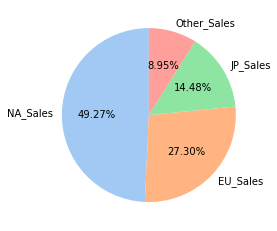

In [7]:
continental_sales = df[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]]
plt.pie(continental_sales.sum(), colors = sns.color_palette('pastel')[0:4], 
        labels = continental_sales.columns,startangle=90,autopct='%1.2f%%')

#For displaying only the graphs, not code outputs
clear_output(wait=True)

### Regional Sales of Each Publishers ###
This is how many publisher exists in our data.

In [8]:
publishers_and_sales = pd.DataFrame(data = {"Publishers":df["Publisher"].drop_duplicates().reset_index(drop=True),
                                          "EU_Sales":np.zeros(579),"NA_Sales":np.zeros(579),"JP_Sales":np.zeros(579),
                                          "Other_Sales":np.zeros(579),
                                          "Total_Sales":np.zeros(579)})

for index, rows in publishers_and_sales.iterrows():

    if rows["Publishers"] in df["Publisher"].values:
           EU_Sales = df[df.Publisher == rows.Publishers]["EU_Sales"].sum()
           NA_Sales = df[df.Publisher == rows.Publishers]["NA_Sales"].sum()
           JP_Sales = df[df.Publisher == rows.Publishers]["JP_Sales"].sum()
           Other_Sales = df[df.Publisher == rows.Publishers]["JP_Sales"].sum()
           Total_Sales = df[df.Publisher == rows.Publishers]["Global_Sales"].sum()
           publishers_and_sales.iloc[index,1] = EU_Sales
           publishers_and_sales.iloc[index,2] = NA_Sales
           publishers_and_sales.iloc[index,3] = JP_Sales
           publishers_and_sales.iloc[index,4] = Other_Sales
           publishers_and_sales.iloc[index,5] = Total_Sales

#### Most Sold 20 Companies ####

In [9]:
Top_Publishers = publishers_and_sales.sort_values(["Total_Sales"],ascending = False).head(20)

As shown in the figure, Nintendo is the best-selling publisher in both 3 regions and overall sales. 
(North America, Europe and Japan)

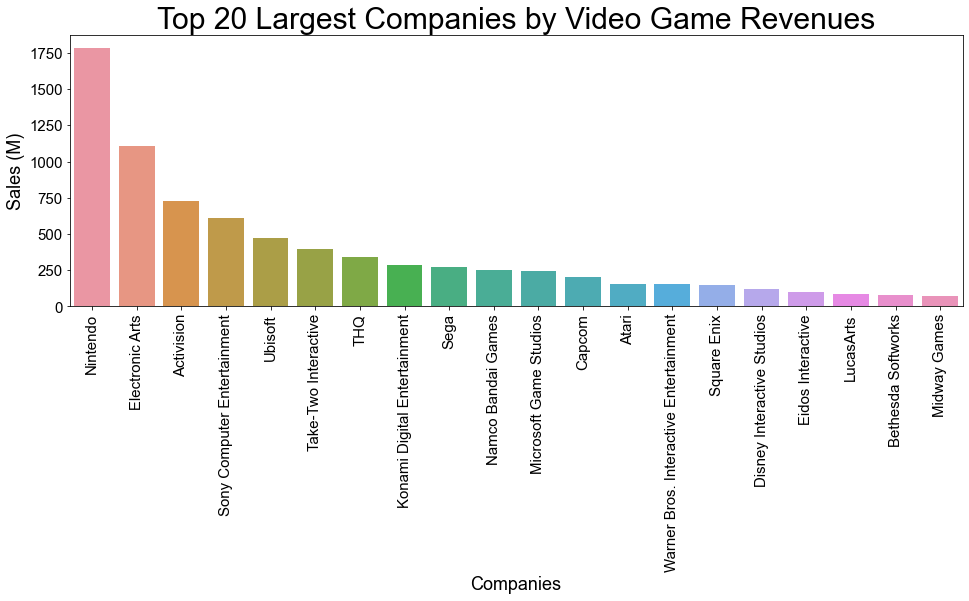

In [10]:
plt.figure(figsize = (16,5))

sns.barplot(x = Top_Publishers["Publishers"], 
        y = Top_Publishers["Total_Sales"])

plt.title("Top 20 Largest Companies by Video Game Revenues",fontsize = 30)

plt.xlabel("Companies",fontsize = 18)
plt.ylabel("Sales (M)",fontsize = 18)

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.xticks(rotation = 90)

plt.style.use("seaborn-dark")

In [11]:
#As shown in the figure, Nintendo has made roughly $1.75 billion profits from game sales over the last 40 years.

#### Progress of Nintendo year by year ####

In [12]:
(df[df.Publisher == "Nintendo"].sort_values("Year", ascending = True).min()[["Year","Name"]],
df[df.Publisher == "Nintendo"].sort_values("Year", ascending = True).max()[["Year","Name"]])

(Year               1983.0
 Name    100 Classic Books
 dtype: object,
 Year                      2016.0
 Name    Zero: Tsukihami no Kamen
 dtype: object)

- The history of the Nintendo company as far as we know dates back to 1983. Also, 100 Classic Books is the first is the first product which has been published.

- Zero: Tsukihami no Kamen is the latest game published in 2016.

In [13]:
Nintendo_Sales = df[df.Publisher == "Nintendo"].sort_values("Year", ascending = True)

Nintendo_Sales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1839,1841,Donkey Kong Jr.,NES,1983.0,Platform,Nintendo,0.33,0.07,0.70,0.01,1.11
763,765,Mahjong,NES,1983.0,Misc,Nintendo,0.01,0.00,2.13,0.00,2.14
421,422,Baseball,NES,1983.0,Sports,Nintendo,0.73,0.10,2.35,0.02,3.20
700,702,Mario Bros.,NES,1983.0,Platform,Nintendo,0.51,0.12,1.63,0.02,2.28
1861,1863,Popeye,NES,1983.0,Platform,Nintendo,0.51,0.12,0.45,0.02,1.10
...,...,...,...,...,...,...,...,...,...,...,...
5508,5510,Custom Robo,N64,NaN,Role-Playing,Nintendo,0.00,0.00,0.29,0.04,0.33
11409,11411,Zero: Tsukihami no Kamen,Wii,NaN,Action,Nintendo,0.00,0.00,0.08,0.00,0.08
14997,15000,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.00,0.00,0.02,0.00,0.02
14999,15002,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.00,0.00,0.02,0.00,0.02


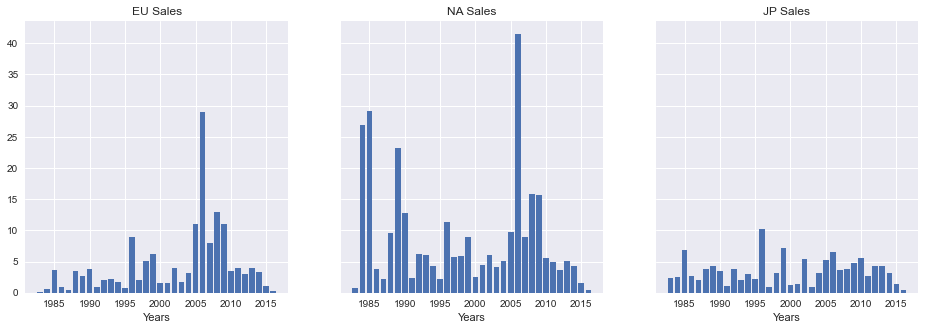

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3 ,figsize = (16,5), sharey= True)

ax1.set_xlabel("Years")
ax1.set_title("EU Sales")

ax2.set_xlabel("Years")
ax2.set_title("NA Sales")

ax3.set_xlabel("Years")   
ax3.set_title("JP Sales")

ax1.bar(Nintendo_Sales["Year"],Nintendo_Sales["EU_Sales"])

ax2.bar(Nintendo_Sales["Year"],Nintendo_Sales["NA_Sales"])
ax3.bar(Nintendo_Sales["Year"],Nintendo_Sales["JP_Sales"])

plt.style.use("seaborn")


It can be said that the games developed by Nintendo until 1995 are more important in the Japanese market and the US market.

Assumption: Since Nintendo is a Japanese and US multinational company, it may not be possible to open up to the European market at first.